In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_venn import venn3
from matplotlib_venn import venn2
from matplotlib_venn import venn2_circles

import cooler
import bioframe
from scipy.spatial.distance import pdist, squareform
from matplotlib.colors import LogNorm
from matplotlib.ticker import EngFormatter
import csv
import pyBigWig

In [2]:
from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

In [3]:
jets = bioframe.read_table('/home/kimj50/cohesin_paper/jets_call/jetcall_v5_w30kb.bed',schema='bed6')

jets['chrom'] = 'chr' + jets['chrom'] ### jets

In [4]:
# smc3
smc3_ctr = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict/SMC3_Q4469_CA1200_JK166_1hrauxin_ext664_summits_final.bed',schema='bed6')
smc3_jk06 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict/SMC3_JK06_1haux_ext4_HW49_input_HW45_summits_final.bed',schema='bed6')
smc3_jk05 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict/SMC3_Q4469_JK05_JK164_1hrauxin_ext662_summits_final.bed',schema='bed6')

# nipbl
nipbl_ctr = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict/PQN85_Q4481_CA1200_JK191_1hrauxin_L3_ext663_summits_final.bed',schema='bed6')
nipbl_jk05 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict/PQN-85_Q4481_HW48_JK06_1h_aux_L2L3_ext758_summits_final.bed',schema='bed6')
nipbl_jk06 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict/PQN85_Q4481_JK05_JK192_1hrauxin_L3_ext662_summits_final.bed',schema='bed6')



In [5]:
ctr = [smc3_ctr,nipbl_ctr]
jk05 = [smc3_jk05,nipbl_jk05]
jk06 = [smc3_jk06,nipbl_jk06]


Text(0.53, -0.03, 'Distance to the nearest jet origin')

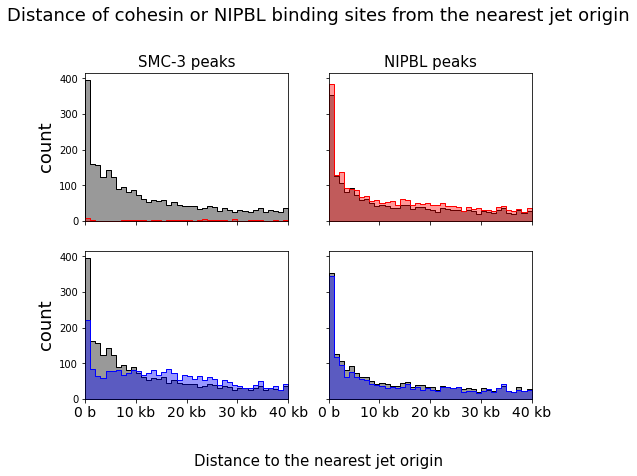

In [6]:
### n peaks, center
f, axs = plt.subplots(
    figsize=(8, 6),
    nrows=2,
    ncols=2,
    sharey=True,
    sharex=True
)
method = 'count'

#Label_1 = 'Control'
#Label_2 = 'SMC-3 depletion'
Labels = ['Control','SMC-3 depletion','WAPL depletion']
Titles = ['SMC-3 peaks', 'NIPBL peaks']
Maxd = 40_000

for i in range(2):
    t = bioframe.closest(ctr[i],jets)
    t2 = t[t['distance']<=Maxd]['distance']
    a = sns.histplot(ax=axs[0,i],data = t2, kde = False, label=Labels[0],
                 stat = method,color='black',alpha=0.4,binwidth=1000,element='step')
    t = bioframe.closest(jk05[i],jets)
    t2 = t[t['distance']<=Maxd]['distance']
    a = sns.histplot(ax=axs[0,i],data = t2, kde = False, label=Labels[1],
                 stat = method,color='red',alpha=0.4,binwidth=1000,element='step')
    a.set_ylabel(method ,rotation=90,fontsize=18,labelpad=4)
    a.set_title(Titles[i],fontsize=15)
    if i == 2:
        a.legend(prop={'size': 14})
    
for i in range(2):
    t = bioframe.closest(ctr[i],jets)
    t2 = t[t['distance']<=Maxd]['distance']
    a = sns.histplot(ax=axs[1,i],data = t2, kde = False, label=Labels[0],
                 stat = method,color='black',alpha=0.4,binwidth=1000,element='step')
    t = bioframe.closest(jk06[i],jets)
    t2 = t[t['distance']<=Maxd]['distance']
    a = sns.histplot(ax=axs[1,i],data = t2, kde = False, label=Labels[2],
                 stat = method,color='blue',alpha=0.4,binwidth=1000,element='step')
    a.set_ylabel(method ,rotation=90,fontsize=18,labelpad=4)
    if i == 2:
        a.legend(prop={'size': 14})
    
    
    a.set_xlabel('')
    format_ticks(a,x=True,y=False,rotate=False)
    a.set_xlim(0,40_000)
    a.xaxis.set_tick_params(labelsize=14)
#    a.set_ylim(0,0.2)

    
f.text(0.53,1,'Distance of cohesin or NIPBL binding sites from the nearest jet origin',fontsize=18, ha='center')

f.text(0.53, -0.03, 'Distance to the nearest jet origin', 
       ha='center',fontsize=15)


In [7]:
# smc3
smc3_ctr_1 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/SMC3_Q4469_CA1200_JK165_1hrauxin_ext663_summits.bed',schema='bed6')
smc3_ctr_2 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/SMC3_Q4469_CA1200_JK166_1hrauxin_ext664_summits.bed',schema='bed6')

smc3_jk06_1 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/SMC3_JK06_1haux_ext1_JK167_input_JK140_summits.bed',schema='bed6')
smc3_jk06_2 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/SMC3_JK06_1haux_ext2_JK185_input_JK186_summits.bed',schema='bed6')
smc3_jk06_3 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/SMC3_JK06_1haux_ext3_HW47_input_HW44_summits.bed',schema='bed6')
smc3_jk06_4 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/SMC3_JK06_1haux_ext4_HW49_input_HW45_summits.bed',schema='bed6')

smc3_jk05_1 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/SMC3_Q4469_JK05_JK163_1hrauxin_ext661_summits.bed',schema='bed6')
smc3_jk05_2 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/SMC3_Q4469_JK05_JK164_1hrauxin_ext662_summits.bed',schema='bed6')


# nipbl
nipbl_ctr_1 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/PQN85_Q4481_CA1200_JK191_1hrauxin_L3_ext663_summits.bed',schema='bed6')
nipbl_ctr_2 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/PQN85_Q4481_CA1200_HW01_1hrauxin_L3_ext696_summits.bed',schema='bed6')

nipbl_jk06_1 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/PQN-85_Q4481_HW46_JK06_1h_aux_L2L3_ext757_summits.bed',schema='bed6')
nipbl_jk06_2 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/PQN-85_Q4481_HW48_JK06_1h_aux_L2L3_ext758_summits.bed',schema='bed6')

nipbl_jk05_1 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/PQN85_Q4481_JK05_JK189_1hrauxin_L3_ext700_summits.bed',schema='bed6')
nipbl_jk05_2 = bioframe.read_table('/scratch/cgsb/ercan/Jun_cohesin/cohesin_revision_2/MACS_strict_reps/PQN85_Q4481_JK05_JK192_1hrauxin_L3_ext662_summits.bed',schema='bed6')



In [8]:
smc3_ctr = [smc3_ctr_1,smc3_ctr_2]
nipbl_ctr = [nipbl_ctr_1,nipbl_ctr_2]

smc3_jk05 = [smc3_jk05_1,smc3_jk05_2]
nipbl_jk05 = [nipbl_jk05_1,nipbl_jk05_2]

smc3_jk06 = [smc3_jk06_1,smc3_jk06_2,smc3_jk06_3,smc3_jk06_4]
nipbl_jk06 = [nipbl_jk06_1,nipbl_jk06_2]

ctr = [smc3_ctr,nipbl_ctr]
jk05 = [smc3_jk05,nipbl_jk05]
jk06 = [smc3_jk06,nipbl_jk06]



Text(0.53, -0.03, 'Distance to the nearest jet origin')

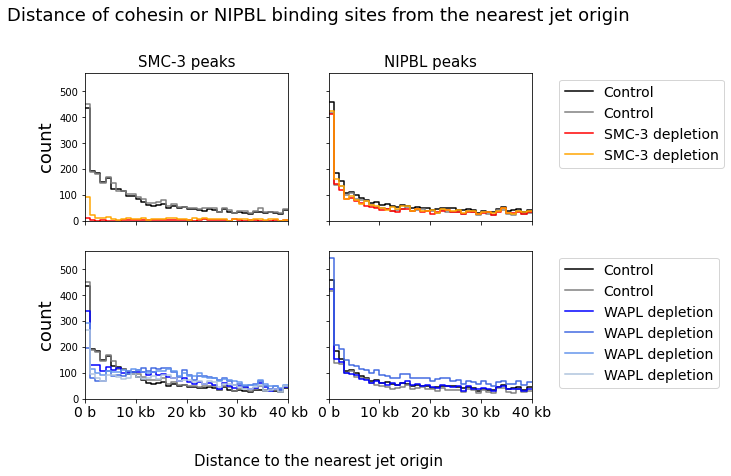

In [9]:
### n peaks, center
f, axs = plt.subplots(
    figsize=(8, 6),
    nrows=2,
    ncols=2,
    sharey=True,
    sharex=True
)
method = 'count'

#Label_1 = 'Control'
#Label_2 = 'SMC-3 depletion'
Labels = ['Control','SMC-3 depletion','WAPL depletion']
Titles = ['SMC-3 peaks', 'NIPBL peaks']
Maxd = 40_000

colors_ctr = ['black','grey']
colors_jk05 = ['red','orange']
colors_jk06 = ['blue','royalblue','cornflowerblue','lightsteelblue']

for i in range(2):
    ctr_condition = ctr[i]
    jk05_condition = jk05[i]
    for j in range(len(ctr_condition)):
        
        t = bioframe.closest(ctr_condition[j],jets)
        t2 = t[t['distance']<=Maxd]['distance']
        a = sns.histplot(ax=axs[0,i],data = t2, kde = False, label=Labels[0],
                     stat = method,color=colors_ctr[j],alpha=0.4,binwidth=1000,element='step',fill=False)
    for j in range(len(jk05_condition)):
        
        t = bioframe.closest(jk05_condition[j],jets)
        t2 = t[t['distance']<=Maxd]['distance']
        a = sns.histplot(ax=axs[0,i],data = t2, kde = False, label=Labels[1],
                     stat = method,color=colors_jk05[j],alpha=0.4,binwidth=1000,element='step',fill=False)
        a.set_ylabel(method ,rotation=90,fontsize=18,labelpad=4)
        a.set_title(Titles[i],fontsize=15)
        if i == 0:
            a.legend(prop={'size': 14},  loc='upper left', bbox_to_anchor=(2.3, 1))


for i in range(2):
    ctr_condition = ctr[i]
    jk06_condition = jk06[i]
    for j in range(len(ctr_condition)):
        t = bioframe.closest(ctr_condition[j],jets)
        t2 = t[t['distance']<=Maxd]['distance']
        a = sns.histplot(ax=axs[1,i],data = t2, kde = False, label=Labels[0],
                     stat = method,color=colors_ctr[j],alpha=0.4,binwidth=1000,element='step',fill=False)

    for j in range(len(jk06_condition)):
        t = bioframe.closest(jk06_condition[j],jets)
        t2 = t[t['distance']<=Maxd]['distance']
        a = sns.histplot(ax=axs[1,i],data = t2, kde = False, label=Labels[2],
                     stat = method,color=colors_jk06[j],alpha=0.4,binwidth=1000,element='step',fill=False)
        a.set_ylabel(method ,rotation=90,fontsize=18,labelpad=4)
        if i == 0:
            a.legend(prop={'size': 14}, loc='upper left', bbox_to_anchor=(2.3, 1))
    
    
    a.set_xlabel('')
    format_ticks(a,x=True,y=False,rotate=False)
    a.set_xlim(0,40_000)
    a.xaxis.set_tick_params(labelsize=14)
#    a.set_ylim(0,0.2)


f.text(0.53,1,'Distance of cohesin or NIPBL binding sites from the nearest jet origin',fontsize=18, ha='center')

f.text(0.53, -0.03, 'Distance to the nearest jet origin', 
       ha='center',fontsize=15)
